## Overview<br>
This dataset contains information about e-commerce products and their characteristics, designed for detecting counterfeit products in online marketplaces. The dataset includes various features related to product listings, seller behavior, and marketplace metrics that can be used to identify potentially fraudulent or counterfeit items.<br>
Dataset Information<br>
Total Records: 5,000 products<br>
Total Features: 27 columns<br>
Target Variable: fraud_indicator (indicates if a product is counterfeit)<br>
File Format: CSV<br>
Dataset Link: https://drive.google.com/drive/folders/1ZR6RqDeWEEjY3IyyFRsqJpqqO24Yhlrc?usp=sharing<br>
# Task 1: Exploratory Data Analysis (EDA)
Objective <br>
Conduct a comprehensive exploratory data analysis to understand the dataset structure, identify patterns, and extract meaningful insights about counterfeit product characteristics.<br>
# 1.1 Data Understanding and Quality Assessment
Data Overview: Provide summary statistics, data types, and dataset structure<br>
Missing Value Analysis: Identify, quantify, and analyze patterns in missing data<br>
Data Quality Issues: Detect and document outliers, inconsistencies, and anomalies<br>
Data Distribution Analysis: Examine distributions of key numerical and categorical variables<br>


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('counterfeit_products_renamed.csv')
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


In [4]:
df.tail()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.29,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,NaN,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True
4997,bfae7e37,seller_8274,Luxury Goods,EliteDesign,293.09,4.6,7255,8,808,1,...,NaN,4289,344,51,3,18,False,False,NaN,False
4998,bc618758,seller_5933,Luxury Goods,EliteDesign,NaN,3.0,14,1,62,37,...,US,2981,155,79,1,0,False,False,NaN,True
4999,f7efbc83,seller_5295,Automotive Parts,AutoParts Pro,401.46,4.3,5721,5,774,10,...,NaN,2544,130,76,3,10,False,True,False,False


In [5]:
df.columns

Index(['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'cost_usd',
       'vendor_score', 'feedback_count', 'image_qty', 'desc_chars',
       'delivery_period', 'typo_count', 'site_age', 'contact_valid',
       'return_clarity', 'payment_options', 'post_timestamp', 'vendor_nation',
       'dispatch_loc', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals',
       'guarantee_term', 'wholesale_avail', 'payment_anomaly',
       'geo_inconsistency', 'fraud_indicator'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [7]:
df.dtypes

item_ref              object
vendor_code           object
product_type          object
manufacturer          object
cost_usd             float64
vendor_score         float64
feedback_count         int64
image_qty              int64
desc_chars             int64
delivery_period        int64
typo_count             int64
site_age             float64
contact_valid           bool
return_clarity          bool
payment_options        int64
post_timestamp        object
vendor_nation         object
dispatch_loc          object
page_hits              int64
sales_vol              int64
saved_items            int64
trust_seals            int64
guarantee_term         int64
wholesale_avail         bool
payment_anomaly         bool
geo_inconsistency     object
fraud_indicator         bool
dtype: object

In [8]:
df.describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


In [9]:
df.shape

(5000, 27)

In [10]:
df.isnull().sum()

item_ref                0
vendor_code             0
product_type            0
manufacturer            0
cost_usd             1348
vendor_score            0
feedback_count          0
image_qty               0
desc_chars              0
delivery_period         0
typo_count              0
site_age                0
contact_valid           0
return_clarity          0
payment_options         0
post_timestamp          0
vendor_nation           0
dispatch_loc          747
page_hits               0
sales_vol               0
saved_items             0
trust_seals             0
guarantee_term          0
wholesale_avail         0
payment_anomaly         0
geo_inconsistency    1249
fraud_indicator         0
dtype: int64

In [11]:
missing_features = [features for features in df.columns if df[features].isnull().sum()>0]

In [12]:
for feature in missing_features:
    print(f"Feature: {feature}, Missing Values: {df[feature].isnull().sum()}")

Feature: cost_usd, Missing Values: 1348
Feature: dispatch_loc, Missing Values: 747
Feature: geo_inconsistency, Missing Values: 1249


## Observation 1
cost_usd has 1348 null elements <br>
dispact_loc has 747 null elements <br>
geo_inconsistency has 1249 null elements <br>

In [13]:
df.isnull().sum().sum()

np.int64(3344)

In [14]:
feature_names = df.columns.tolist()
print(feature_names)

['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'cost_usd', 'vendor_score', 'feedback_count', 'image_qty', 'desc_chars', 'delivery_period', 'typo_count', 'site_age', 'contact_valid', 'return_clarity', 'payment_options', 'post_timestamp', 'vendor_nation', 'dispatch_loc', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals', 'guarantee_term', 'wholesale_avail', 'payment_anomaly', 'geo_inconsistency', 'fraud_indicator']


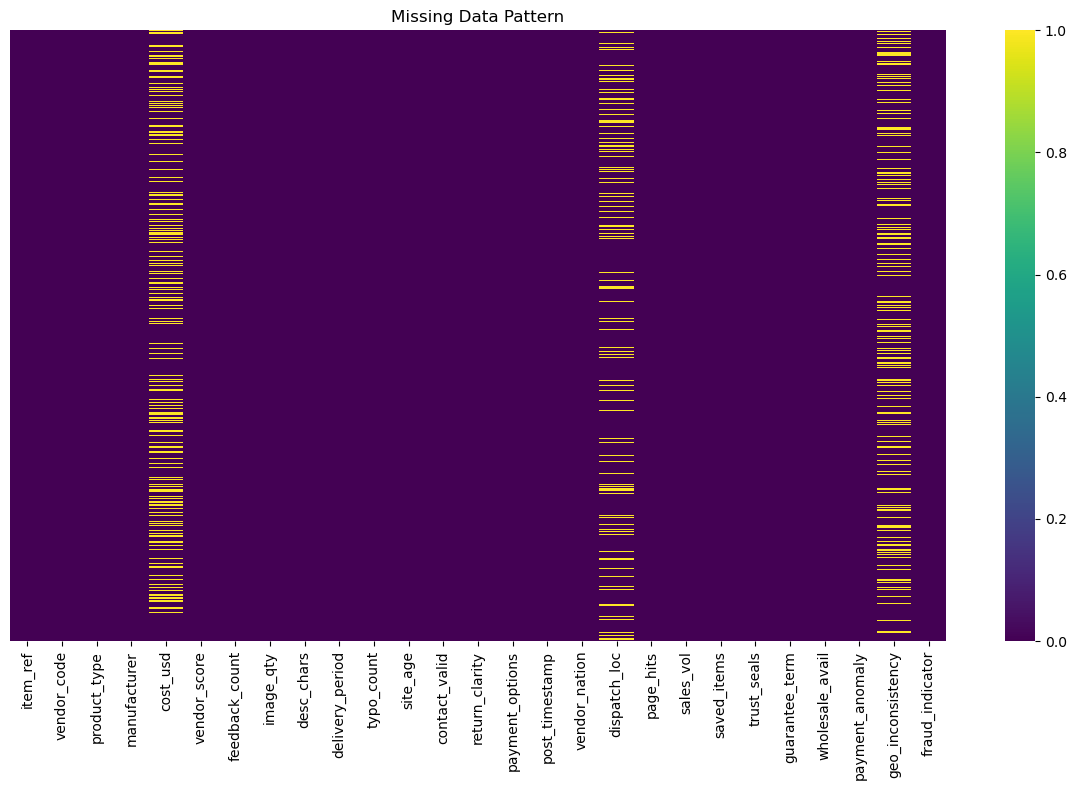

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.tight_layout()
plt.show()

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
#detecting outliers

key_numerical = ['cost_usd', 'vendor_score', 'feedback_count', 'sales_vol', 'page_hits', 'delivery_period']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers)

print("Outlier counts (IQR method):")
for col in key_numerical:
    if col in df.columns:
        outlier_count = detect_outliers_iqr(df, col)
        outlier_pct = (outlier_count / len(df)) * 100
        print(f"{col}: {outlier_count} outliers ({outlier_pct:.1f}%)")

Outlier counts (IQR method):
cost_usd: 0 outliers (0.0%)
vendor_score: 470 outliers (9.4%)
feedback_count: 0 outliers (0.0%)
sales_vol: 85 outliers (1.7%)
page_hits: 0 outliers (0.0%)
delivery_period: 322 outliers (6.4%)


In [18]:
#key numerical data distribution

key_numerical = ['cost_usd', 'vendor_score', 'feedback_count', 'sales_vol', 'page_hits', 'delivery_period']
key_numerical_distribution = df[key_numerical].describe()
print(key_numerical_distribution)

          cost_usd  vendor_score  feedback_count    sales_vol    page_hits  \
count  3652.000000   5000.000000     5000.000000  5000.000000  5000.000000   
mean    224.710643      3.732980     3529.809200   123.050800  2469.286600   
std     136.900310      0.995313     3281.418979   107.889725  1424.525316   
min      10.120000      1.000000        0.000000     0.000000    10.000000   
25%     109.825000      3.500000       85.000000    34.000000  1245.750000   
50%     191.815000      4.000000     2922.500000    93.000000  2433.000000   
75%     336.615000      4.500000     6401.500000   185.000000  3701.500000   
max     499.840000      5.000000     9996.000000   491.000000  4996.000000   

       delivery_period  
count        5000.0000  
mean           13.4622  
std            11.5496  
min             1.0000  
25%             5.0000  
50%            10.0000  
75%            18.0000  
max            44.0000  


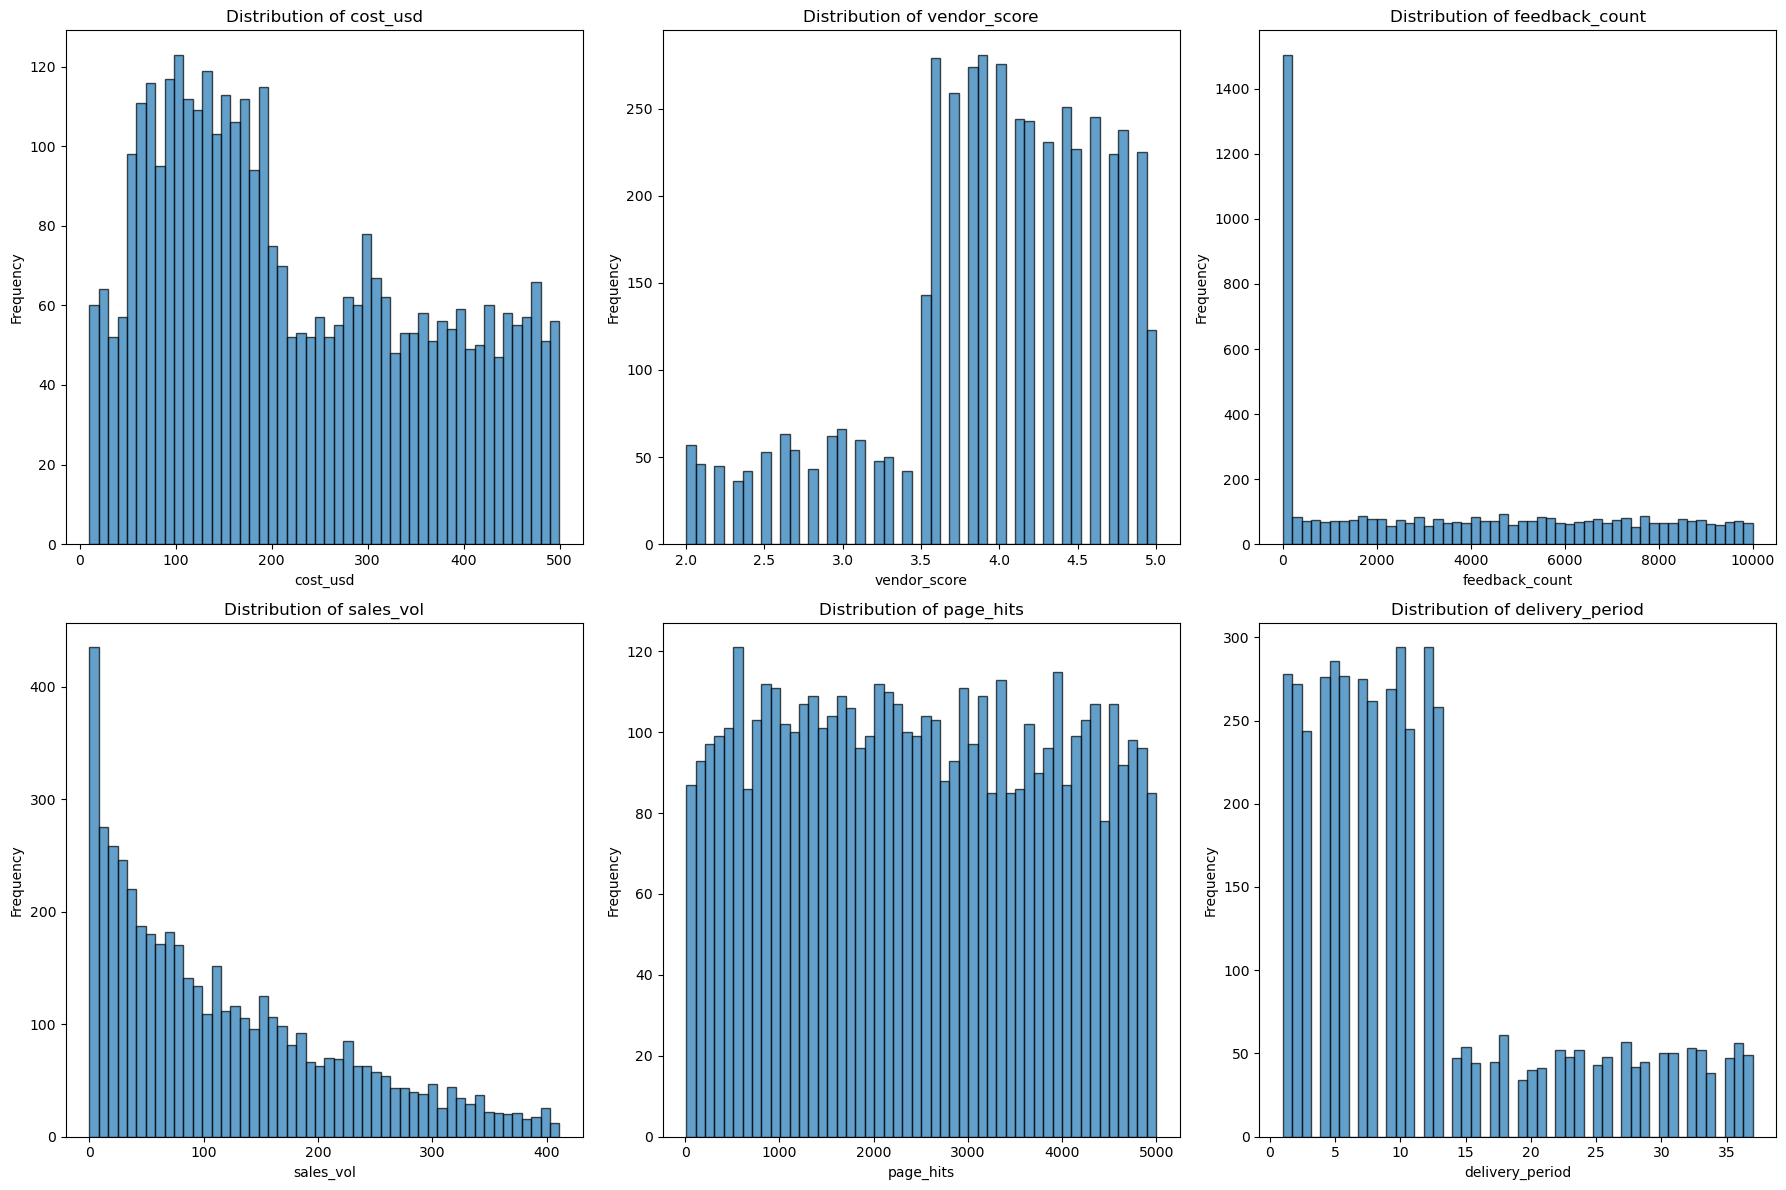

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_numerical[:6]):
    if col in df.columns:
        # Remove outliers for better visualization
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        data_clean = df[col][(df[col] >= lower) & (df[col] <= upper)].dropna()
        
        axes[i].hist(data_clean, bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Categorical Variables:

product_type:
product_type
Luxury Goods        870
Pharmaceuticals     842
Automotive Parts    842
Electronics         841
Cosmetics           825
Name: count, dtype: int64

manufacturer:
manufacturer
LuxuryBrand        200
HealthCare Plus    181
AutoParts Pro      180
CircuitMaster      176
ExclusiveItems     176
Name: count, dtype: int64

contact_valid:
contact_valid
True     3618
False    1382
Name: count, dtype: int64

return_clarity:
return_clarity
True     3465
False    1535
Name: count, dtype: int64

post_timestamp:
post_timestamp
2023-07-07    13
2024-10-22    12
2025-06-28    12
2024-08-04    11
2025-04-02    11
Name: count, dtype: int64

vendor_nation:
vendor_nation
FR    524
KR    520
US    519
CA    511
AU    504
Name: count, dtype: int64

dispatch_loc:
dispatch_loc
KR    449
CA    447
CN    438
US    427
DE    424
Name: count, dtype: int64

wholesale_avail:
wholesale_avail
False    3998
True     1002
Name: count, dtype: int64

payment_anomaly:
paym

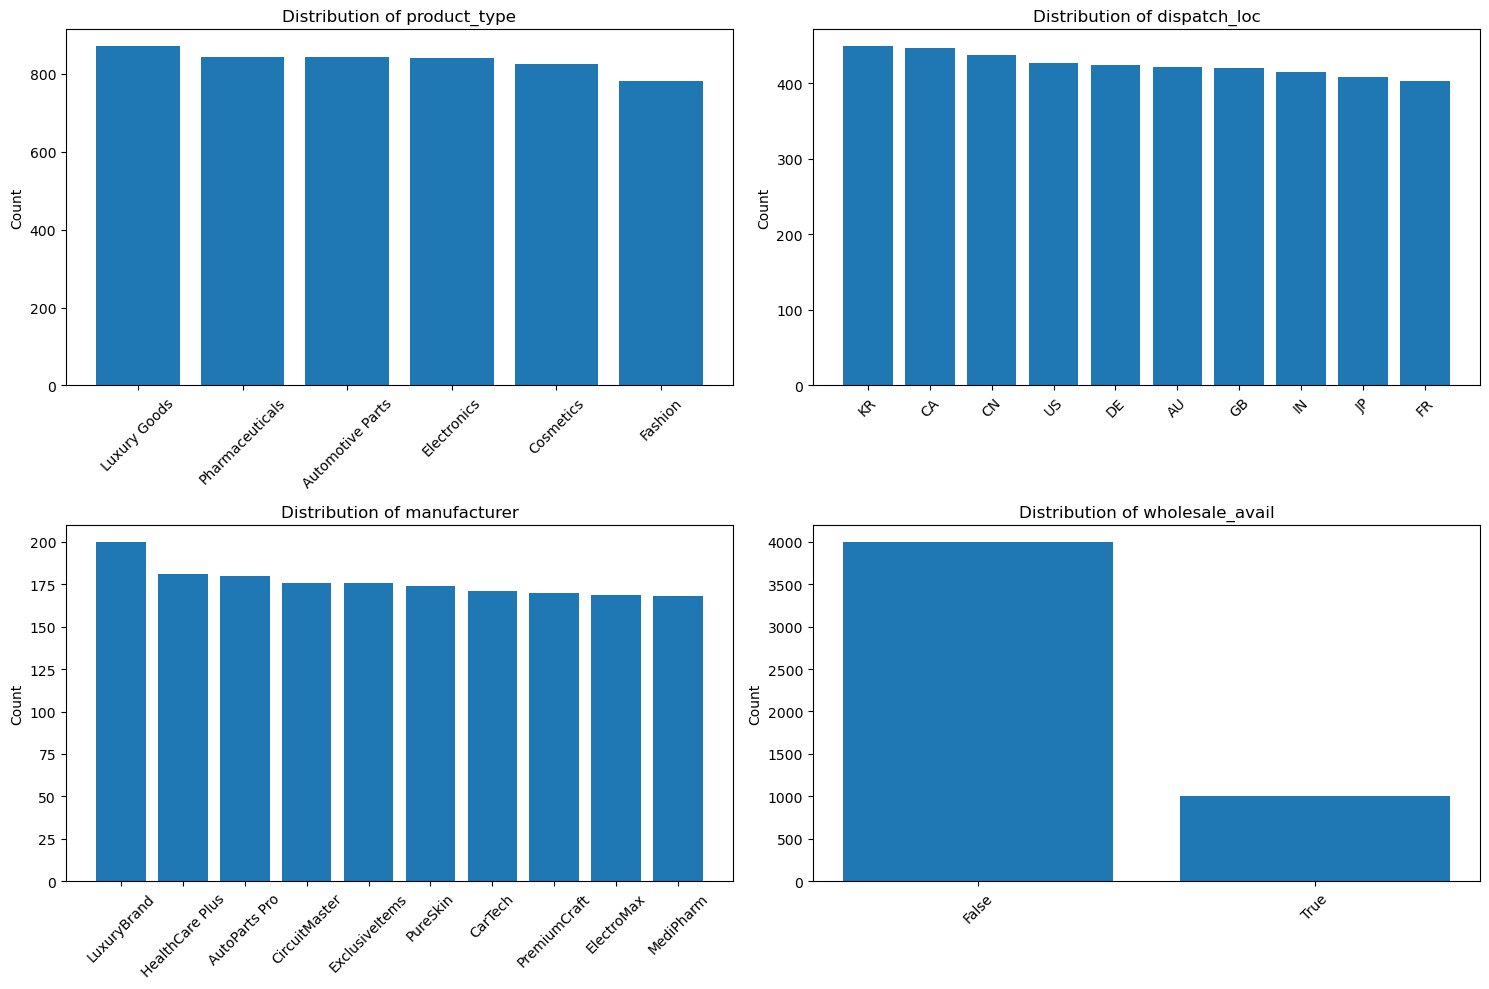

In [20]:
# Categorical variables analysis
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['item_ref', 'vendor_code']]

print(f"\nCategorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())
    
# Plot key categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
key_categorical = ['product_type', 'dispatch_loc', 'manufacturer', 'wholesale_avail']

for i, col in enumerate(key_categorical):
    if col in df.columns:
        row, col_idx = divmod(i, 2)
        if col == 'manufacturer':
            # Show only top 10 manufacturers
            top_manufacturers = df[col].value_counts().head(10)
            axes[row, col_idx].bar(range(len(top_manufacturers)), top_manufacturers.values)
            axes[row, col_idx].set_xticks(range(len(top_manufacturers)))
            axes[row, col_idx].set_xticklabels(top_manufacturers.index, rotation=45)
        else:
            value_counts = df[col].value_counts()
            axes[row, col_idx].bar(range(len(value_counts)), value_counts.values)
            axes[row, col_idx].set_xticks(range(len(value_counts)))
            axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45)
        
        axes[row, col_idx].set_title(f'Distribution of {col}')
        axes[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()


4. BIVARIATE ANALYSIS WITH TARGET


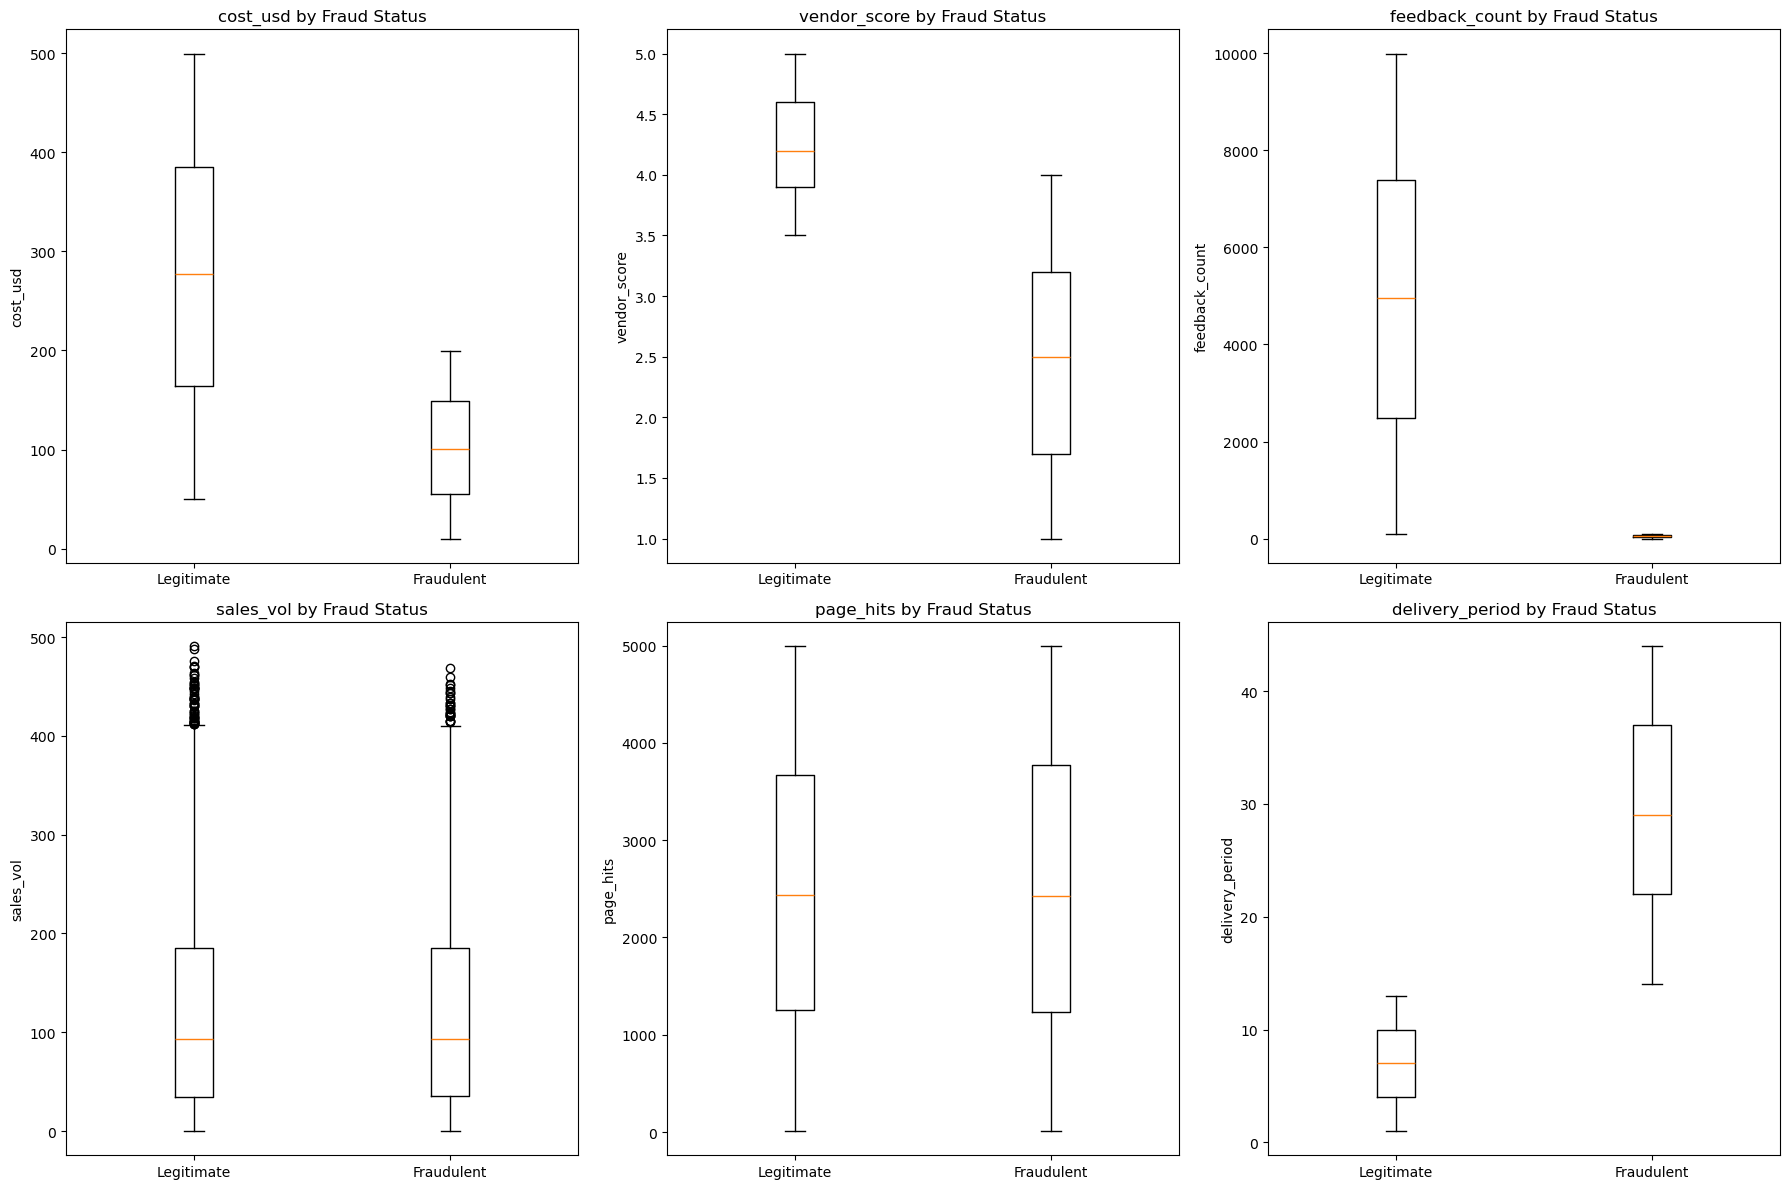

In [21]:
# 4. BIVARIATE ANALYSIS WITH TARGET
print("\n" + "=" * 60)
print("4. BIVARIATE ANALYSIS WITH TARGET")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_numerical[:6]):
    if col in df.columns:
        # Box plot for each numerical feature by fraud indicator
        df_clean = df[df[col].notna()]
        axes[i].boxplot([df_clean[df_clean['fraud_indicator'] == False][col].dropna(),
                        df_clean[df_clean['fraud_indicator'] == True][col].dropna()],
                       labels=['Legitimate', 'Fraudulent'])
        axes[i].set_title(f'{col} by Fraud Status')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

6. CORRELATION ANALYSIS


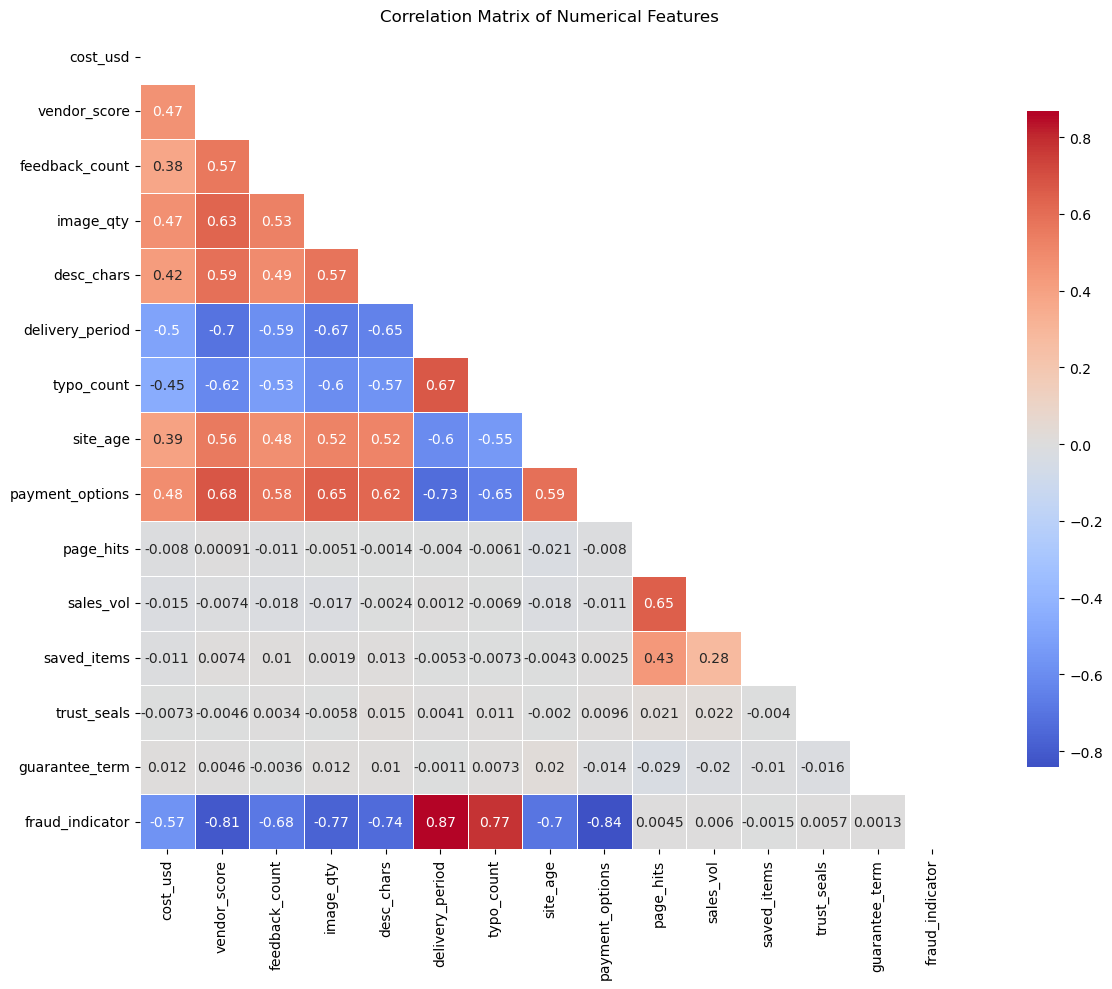

Features most correlated with fraud_indicator:
delivery_period    0.867171
payment_options    0.841770
vendor_score       0.809984
typo_count         0.773749
image_qty          0.772673
desc_chars         0.741478
site_age           0.697074
feedback_count     0.684206
cost_usd           0.573240
sales_vol          0.005975
Name: fraud_indicator, dtype: float64


In [22]:
print("6. CORRELATION ANALYSIS")
print("=" * 60)

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_cols = numerical_cols + ['fraud_indicator']
corr_matrix = df[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Features most correlated with target
target_corr = corr_matrix['fraud_indicator'].abs().sort_values(ascending=False)
print("Features most correlated with fraud_indicator:")
print(target_corr[1:].head(10))  # Exclude self-correlation

In [23]:
vendor_score = (
    df.groupby(['vendor_code', 'fraud_indicator'])['vendor_score']
      .mean()
      .reset_index()
)
print(vendor_score)


      vendor_code  fraud_indicator  vendor_score
0     seller_1000            False          4.70
1     seller_1002             True          2.05
2     seller_1007            False          3.70
3     seller_1008             True          2.10
4     seller_1010            False          3.85
...           ...              ...           ...
4251  seller_9995            False          4.70
4252  seller_9996            False          4.70
4253  seller_9997            False          4.90
4254  seller_9997             True          3.90
4255  seller_9998             True          3.60

[4256 rows x 3 columns]


In [24]:
df.describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000
